# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_80/result-lstm-tcp80-hl2-seq5-do0.2-oov1500-part_2_Treatment_testing_80.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_80/part_2_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.51-56899-178.255.83.1-80-tcp,0.045977,0,0,0,19337.472093,0,0,0
1,192.168.10.25-52301-172.217.10.8-80-tcp,0.087349,0,0,0,15343.804281,0,0,0
2,192.168.10.8-59456-172.224.8.45-80-tcp,0.062344,0,0,0,31488.366162,0,0,0
3,192.168.10.15-53094-162.208.20.178-80-tcp,0.043814,0,0,0,21687.054830,0,0,0
4,192.168.10.15-54809-52.84.145.119-80-tcp,0.054750,0,0,0,17383.922078,0,0,0


In [4]:
df_truth.head()

,ID,Label
0,192.168.10.51-56899-178.255.83.1-80-tcp,BENIGN
1,192.168.10.25-52301-172.217.10.8-80-tcp,BENIGN
2,192.168.10.8-59456-172.224.8.45-80-tcp,BENIGN
3,192.168.10.15-53094-162.208.20.178-80-tcp,BENIGN
4,192.168.10.15-54809-52.84.145.119-80-tcp,BENIGN


In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        23703
0         5397
Name: count, dtype: int64

## Exploratory Data Analysis

In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        23703
0         5397
Name: count, dtype: int64

In [7]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           23542
0            5558
Name: count, dtype: int64

In [8]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [10]:
df_pred["id"]

0          192.168.10.51-56899-178.255.83.1-80-tcp
1          192.168.10.25-52301-172.217.10.8-80-tcp
2           192.168.10.8-59456-172.224.8.45-80-tcp
3        192.168.10.15-53094-162.208.20.178-80-tcp
4         192.168.10.15-54809-52.84.145.119-80-tcp
                           ...                    
29095       192.168.10.9-6141-172.217.9.238-80-tcp
29096    192.168.10.19-57998-54.221.250.240-80-tcp
29097      192.168.10.9-21286-146.88.138.32-80-tcp
29098     192.168.10.5-51180-151.101.210.49-80-tcp
29099      192.168.10.8-49520-46.229.145.10-80-tcp
Name: id, Length: 29100, dtype: object

In [11]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0          192.168.10.51-56899-178.255.83.1-80-tcp
1          192.168.10.25-52301-172.217.10.8-80-tcp
2           192.168.10.8-59456-172.224.8.45-80-tcp
3        192.168.10.15-53094-162.208.20.178-80-tcp
4         192.168.10.15-54809-52.84.145.119-80-tcp
                           ...                    
29095       192.168.10.9-6141-172.217.9.238-80-tcp
29096    192.168.10.19-57998-54.221.250.240-80-tcp
29097      192.168.10.9-21286-146.88.138.32-80-tcp
29098     192.168.10.5-51180-151.101.210.49-80-tcp
29099      192.168.10.8-49520-46.229.145.10-80-tcp
Name: ID, Length: 29100, dtype: object

In [12]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [14]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
5915,172.16.0.1-33888-192.168.10.50-80-tcp,0.113580,1,1,1,20916.592500,0,0,0,1
5916,172.16.0.1-33888-192.168.10.50-80-tcp,0.113580,1,1,1,20916.592500,0,0,0,1
5917,172.16.0.1-33888-192.168.10.50-80-tcp,0.113580,1,1,1,20916.592500,0,0,0,1
5918,172.16.0.1-33888-192.168.10.50-80-tcp,0.113580,1,1,1,20916.592500,0,0,0,1
5919,172.16.0.1-48030-192.168.10.50-80-tcp,0.184971,1,1,1,26225.105572,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
67449,172.16.0.1-54546-192.168.10.50-80-tcp,0.144330,1,1,1,24550.384615,0,0,0,1
67450,172.16.0.1-42832-192.168.10.50-80-tcp,0.130556,1,1,1,24459.701408,0,0,0,1
67451,172.16.0.1-42832-192.168.10.50-80-tcp,0.130556,1,1,1,24459.701408,0,0,0,1
67452,172.16.0.1-42832-192.168.10.50-80-tcp,0.130556,1,1,1,24459.701408,0,0,0,1


In [15]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.51-56899-178.255.83.1-80-tcp,0.045977,0,0,0,19337.472093,0,0,0,0
1,192.168.10.25-52301-172.217.10.8-80-tcp,0.087349,0,0,0,15343.804281,0,0,0,0
2,192.168.10.8-59456-172.224.8.45-80-tcp,0.062344,0,0,0,31488.366162,0,0,0,0
3,192.168.10.15-53094-162.208.20.178-80-tcp,0.043814,0,0,0,21687.054830,0,0,0,0
4,192.168.10.15-54809-52.84.145.119-80-tcp,0.054750,0,0,0,17383.922078,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71067,192.168.10.5-51180-151.101.210.49-80-tcp,0.032453,0,0,0,19136.380303,0,0,0,0
71068,192.168.10.5-51180-151.101.210.49-80-tcp,0.032453,0,0,0,19136.380303,0,0,0,0
71069,192.168.10.5-51180-151.101.210.49-80-tcp,0.032453,0,0,0,19136.380303,0,0,0,0
71070,192.168.10.5-51180-151.101.210.49-80-tcp,0.032453,0,0,0,19136.380303,0,0,0,0


In [16]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.51-56899-178.255.83.1-80-tcp,0.045977,0,0,0,19337.472093,0,0,0,0
1,192.168.10.25-52301-172.217.10.8-80-tcp,0.087349,0,0,0,15343.804281,0,0,0,0
2,192.168.10.8-59456-172.224.8.45-80-tcp,0.062344,0,0,0,31488.366162,0,0,0,0
3,192.168.10.15-53094-162.208.20.178-80-tcp,0.043814,0,0,0,21687.054830,0,0,0,0
4,192.168.10.15-54809-52.84.145.119-80-tcp,0.054750,0,0,0,17383.922078,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71067,192.168.10.5-51180-151.101.210.49-80-tcp,0.032453,0,0,0,19136.380303,0,0,0,0
71068,192.168.10.5-51180-151.101.210.49-80-tcp,0.032453,0,0,0,19136.380303,0,0,0,0
71069,192.168.10.5-51180-151.101.210.49-80-tcp,0.032453,0,0,0,19136.380303,0,0,0,0
71070,192.168.10.5-51180-151.101.210.49-80-tcp,0.032453,0,0,0,19136.380303,0,0,0,0


In [17]:
df_pred[['Label']].value_counts()

Label
1        61539
0         9533
Name: count, dtype: int64

In [18]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [19]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [20]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
71067,0
71068,0
71069,0
71070,0


### Detection Rate

In [21]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.9804189213344383
Recall-Binary-b_iqr: 0.9800776743203496
Recall-Binary-b_zscore: 0.9754789645590601
Recall-Floating-f_mean: 0.10323534669071646
Recall-Floating-f_iqr: 0.10333284583759893
Recall-Floating-f_zscore: 0.10105786574367474


### Confussion Matrix

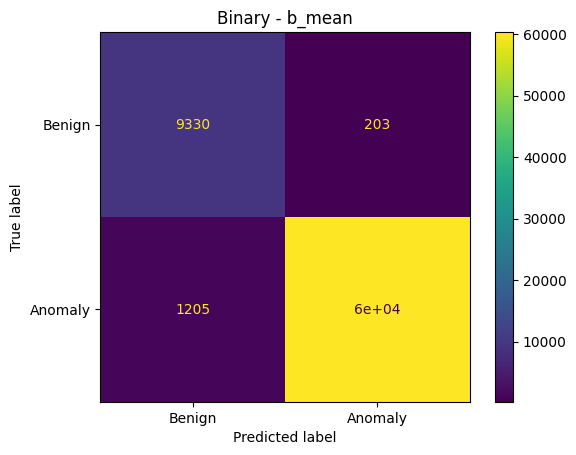

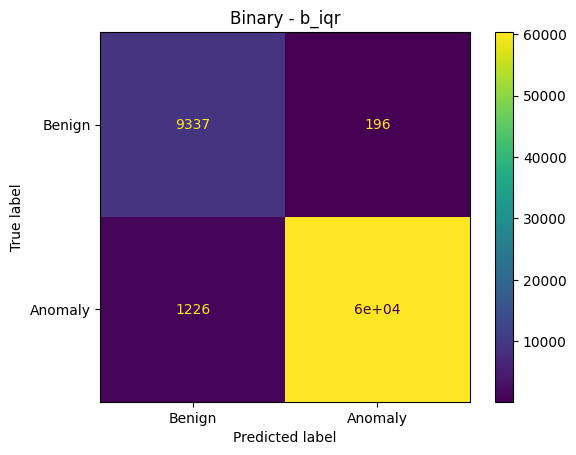

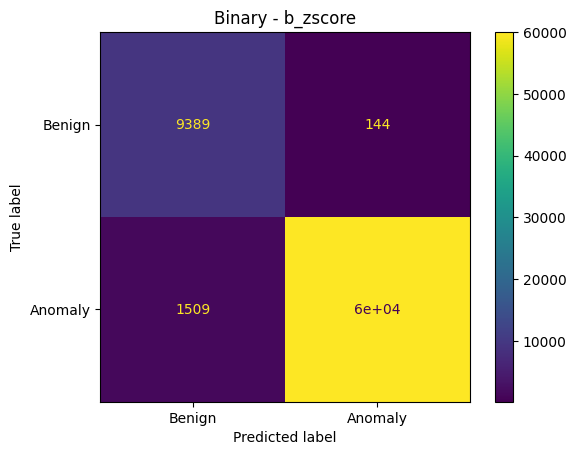

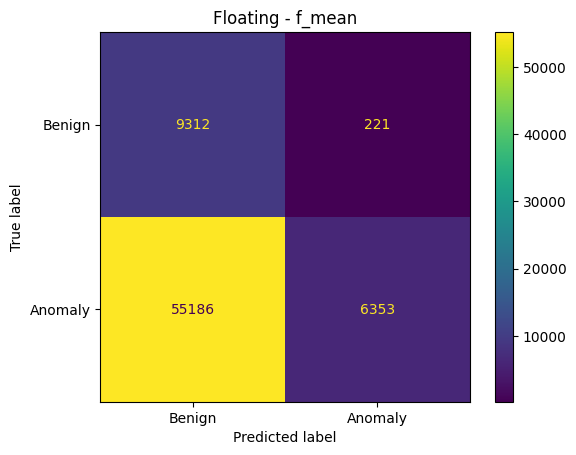

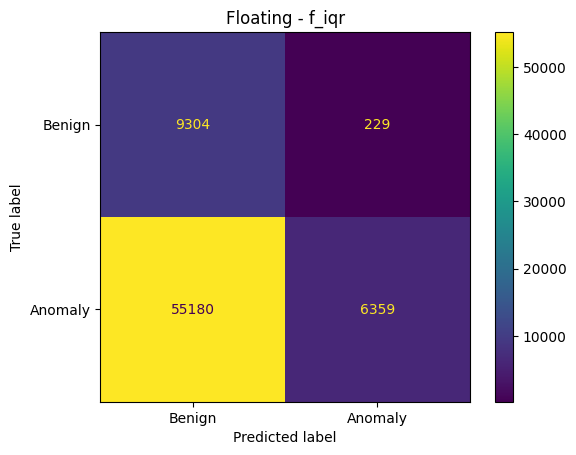

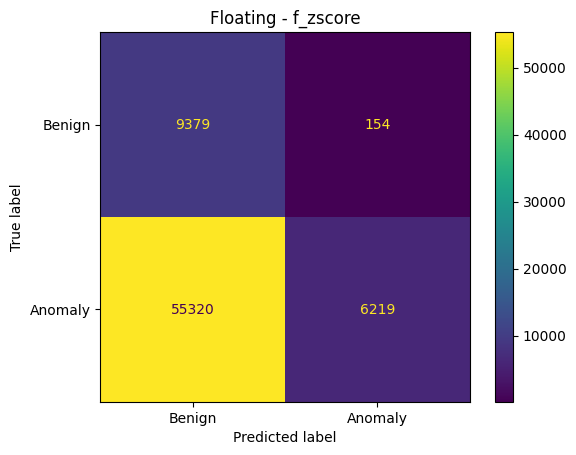

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [23]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.9836220585406253
F2-Binary-b_iqr: 0.9833694748341023
F2-Binary-b_zscore: 0.9798256781901871
F2-Floating-f_mean: 0.1256874925810153
F2-Floating-f_iqr: 0.12579922767701707
F2-Floating-f_zscore: 0.12313437268590934


### FPR Score

In [24]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.021294450854925
FPR-Binary-b_iqr: 0.02056015944613448
FPR-Binary-b_zscore: 0.015105423266547782
FPR-Floating-f_mean: 0.02318262876324347
FPR-Floating-f_iqr: 0.024021818944718346
FPR-Floating-f_zscore: 0.016154410993391377


In [25]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.9801891040072039
Accuracy-Binary-b_iqr: 0.9799921206663665
Accuracy-Binary-b_zscore: 0.9767418955425484
Accuracy-Floating-f_mean: 0.22041028815848718
Accuracy-Floating-f_iqr: 0.22038214768122466
Accuracy-Floating-f_zscore: 0.2194675821701936


In [26]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.980419,0.983622,0.021294,0.980189
b_iqr,0.980078,0.983369,0.020560,0.979992
b_zscore,0.975479,0.979826,0.015105,0.976742
f_mean,0.103235,0.125687,0.023183,0.220410
f_iqr,0.103333,0.125799,0.024022,0.220382
f_zscore,0.101058,0.123134,0.016154,0.219468


In [27]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [28]:
# %pip install openpyxl